# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as po
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install graphviz
import graphviz
import matplotlib.pyplot as plt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE

data = po.read_csv(url, names=names)

invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)

data = data.dropna(axis=0).reset_index(drop=True)
data.head(10)


x_cols = names[:-1]
y_col = names[-1]


X_train, X_test, y_train, y_test = train_test_split(data[x_cols], data[y_col], test_size=.20, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.20, random_state=0)



## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
high_depth_tree = DecisionTreeClassifier(criterion="entropy", random_state = None, max_depth = 15, min_samples_leaf = 5)
high_depth_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

Print accuracy of training and validation data.

In [ ]:
high_depth_train_pred = high_depth_tree.predict(X_train)
high_depth_val_pred = high_depth_tree.predict(X_val)
print("High depth tree:")
print("Training accuracy:", accuracy_score(y_train, high_depth_train_pred)*100, '%')
print("Validation accuracy:", accuracy_score(y_val, high_depth_val_pred)*100, '%')

High depth tree:
Training accuracy: 91.2 %
Validation accuracy: 76.19047619047619 %


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
low_depth_tree = DecisionTreeClassifier(criterion="entropy", random_state = None, max_depth = 5, min_samples_leaf = 15)
low_depth_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=15)

Print accuracy of training and validation data.

In [ ]:
low_depth_train_pred = low_depth_tree.predict(X_train)
low_depth_val_pred = low_depth_tree.predict(X_val)
print("Low depth tree:")
print("Training accuracy:", accuracy_score(y_train, low_depth_train_pred)*100, '%')
print("Validation accuracy:", accuracy_score(y_val, low_depth_val_pred)*100, '%')

Low depth tree:
Training accuracy: 80.80000000000001 %
Validation accuracy: 80.95238095238095 %


Explain the accuracy results below. 

Higher training accuracy for high depth, and higher validation accuracy for low depth. 

## Metrics

Plot the ROC curve and print the AUC of the second model.

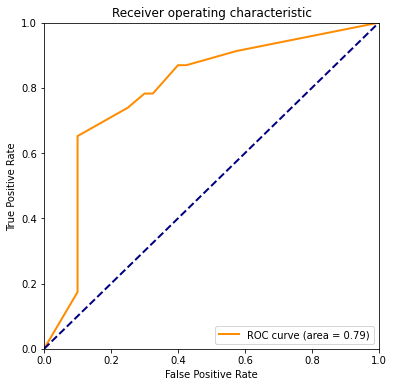

In [ ]:
## YOUR CODE HERE
val_prob = low_depth_tree.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, val_prob[:, 1])

roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

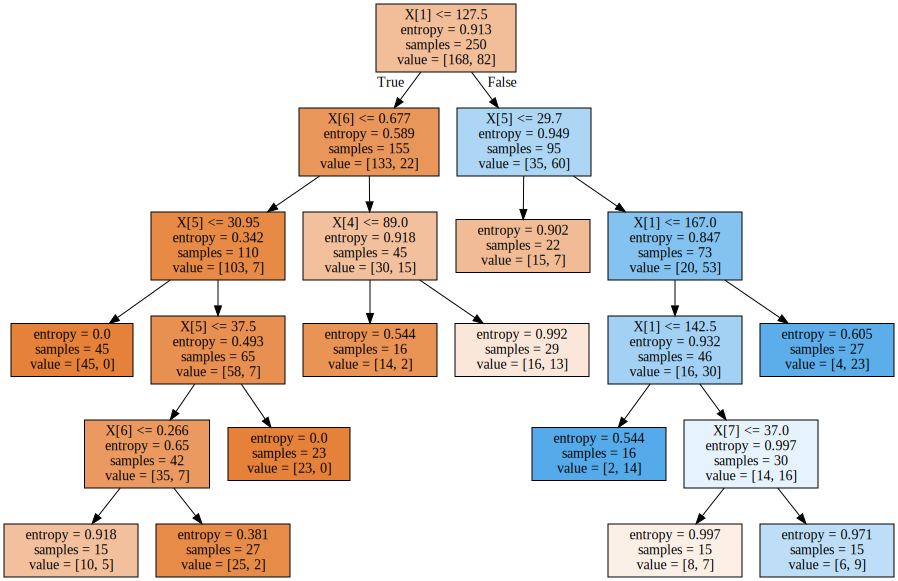

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(low_depth_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph


#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

The column in X_train, or the feature that's being queried at that node.

Question 2: What is the root feature? Does it make sense as the root feature?

The root feature is the first split in the data. And the root feature does make sense because it does split the data well without too many or too little one one side. 

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

The training accuracy would be 100%, but the test accuracy would be quite low because the tree would overfit to the training data.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE

vhigh_depth_tree = DecisionTreeClassifier(criterion="entropy", random_state = None, max_depth = 500, min_samples_leaf = 1)
vhigh_depth_tree.fit(X_train, y_train)
vhigh_depth_train_pred = vhigh_depth_tree.predict(X_train)
vhigh_depth_val_pred = vhigh_depth_tree.predict(X_val)
print("High depth tree:")
print("Training accuracy:", accuracy_score(y_train, vhigh_depth_train_pred)*100, '%')
print("Validation accuracy:", accuracy_score(y_val, vhigh_depth_val_pred)*100, '%')

High depth tree:
Training accuracy: 100.0 %
Validation accuracy: 79.36507936507937 %


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE

rand_forest = RandomForestClassifier(n_estimators = 100)

rand_forest.fit(X_train, y_train)

y_train_pred = rand_forest.predict(X_train)
y_val_pred = rand_forest.predict(X_val)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
print("Random Forest:")
print("Training accuracy:", accuracy_score(y_train, y_train_pred)*100, '%')
print("Validation accuracy:", accuracy_score(y_val, y_val_pred)*100, '%')

Random Forest:
Training accuracy: 100.0 %
Validation accuracy: 80.95238095238095 %


How did the accuracy compare to the decision tree's accuracy?

The training accuracy is much higher, while the validation accuracy is the same as our low-depth decision tree. However, the validation accuracy does fluctuate due to randomization.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
importances = rand_forest.feature_importances_.argsort()
important = importances[-1:-4:-1]
for i in important:
    print(names[i])


#print(importances[-3:])



#importances[-1] ----> index of the most important feature in array "names"

plas
test
age


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

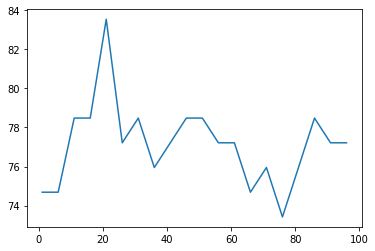

In [ ]:
## YOUR CODE HERE
test_preds = []
for i in range(1,100,5):
    rand_forest = RandomForestClassifier(n_estimators = i)
    rand_forest.fit(X_train, y_train)

    y_test_pred = rand_forest.predict(X_test)
    cur_acc = accuracy_score(y_test, y_test_pred)*100
    test_preds.append(cur_acc)

plt.plot(range(1, 100, 5), test_preds)

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

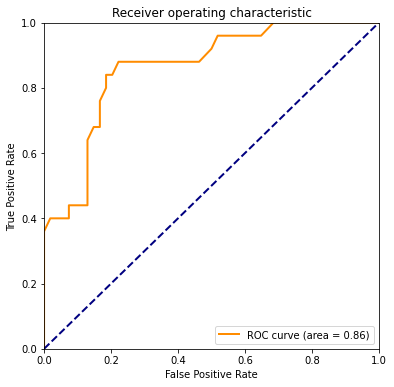

In [ ]:
## YOUR CODE HERE
test_prob = rand_forest.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_prob[:, 1])

roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6eb312d5-62b7-42e3-a19a-ad8b15b7fa98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>